<a href="https://colab.research.google.com/github/hasnanasa/AI-projects/blob/main/MNIST%20digit%20classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#IMPORTING DEPENDENCI
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



loading the MNIST data

In [12]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
#shape of the numpy arrays
print(X_train.shape,Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
#training data =60 000images
#test dta =10000 images
#image dimension =28*28
#Grayscale image ->1 channel


In [15]:
#prainting the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [16]:
print(X_train[10].shape)

(28, 28)


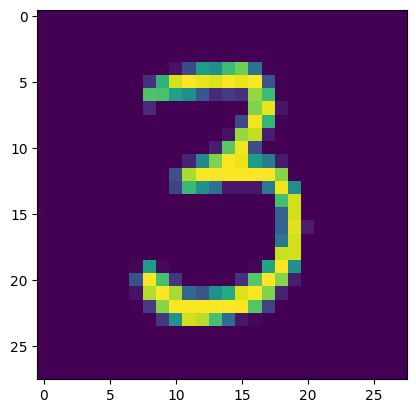

In [17]:
#displaying the image
plt.imshow(X_train[50])
plt.show()

In [18]:
#print the corresponding label
print(Y_train[666])

0


image lables

In [19]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [20]:
#unique values in Y__train
print(np.unique(Y_train))
#unique values in Y_test
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these lables as such or we can also apply one ot encoding

all the images have the same

In [21]:
#scaling the value
X_train = X_train/255
X_test = X_test/255

In [22]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building the neural netwrok

In [27]:
#setting up the layers of NN
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(50, activation='relu'),keras.layers.Dense(50,activation='relu'),keras.layers.Dense(10, activation='sigmoid')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compilling the neural network

In [29]:
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the NN
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8529 - loss: 0.5215
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9551 - loss: 0.1493
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9664 - loss: 0.1080
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9744 - loss: 0.0828
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0673
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0559
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0472
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0399
Epoch 9/10
 446/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0323

training data accuracy =98.9%

**Accuracy on test data**

In [32]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1413
0.9700000286102295


**texte en gras**

**Test data accuracy =97.1%**

In [33]:
print(X_test.shape)

(10000, 28, 28)


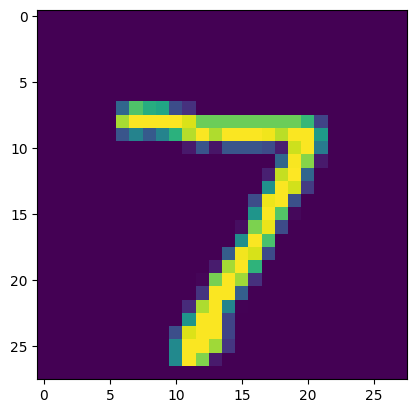

In [37]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [35]:
print(Y_test[0])

7


In [38]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
print(Y_pred.shape)

(10000, 10)


In [41]:
print(Y_pred.shape)

(10000, 10)


In [42]:
print(Y_pred[0])

[9.1700485e-06 2.4069424e-03 8.1619240e-02 7.4484599e-01 4.7208559e-06
 1.1408486e-04 6.4215487e-06 9.9998909e-01 2.8283083e-01 4.3157607e-01]


model.predict() gives the prediction probabillity of each class for the data point

In [45]:
#converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [46]:
#converting the prediction probabillities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [47]:
print(Y_pred)

[[9.1700485e-06 2.4069424e-03 8.1619240e-02 ... 9.9998909e-01
  2.8283083e-01 4.3157607e-01]
 [9.4129509e-06 9.9173421e-01 1.0000000e+00 ... 1.2985914e-04
  1.4535296e-03 1.3863172e-11]
 [1.4339478e-04 9.9948233e-01 3.6816788e-03 ... 4.8273003e-01
  2.7656090e-01 7.0012766e-03]
 ...
 [6.6649967e-12 2.5376199e-08 1.4414949e-11 ... 3.6554594e-02
  1.1901128e-03 9.4085181e-01]
 [1.1196076e-07 9.8173896e-06 1.6989925e-05 ... 1.9789759e-05
  9.9842733e-01 9.8424352e-05]
 [8.9499244e-04 2.8444459e-11 1.1691315e-03 ... 6.1596928e-09
  1.1302602e-03 5.4585986e-10]]


confusion matrix

In [48]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 955    0    1    2    4    3    2    0    2   11]
 [   1 1115    4    0    2    3    6    0    4    0]
 [   4    0 1001    6    2    1    3    6    9    0]
 [   0    0    5  978    2    6    0    3    5   11]
 [   0    0    7    0  949    2    5    3    2   14]
 [   3    0    0    9    1  858    3    2    7    9]
 [   4    2    4    0    6    7  931    1    3    0]
 [   0    3    7    1    0    1    0  990    3   23]
 [   3    0    3    7    2    2    5    2  940   10]
 [   0    1    0    1    7    1    1    7    8  983]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

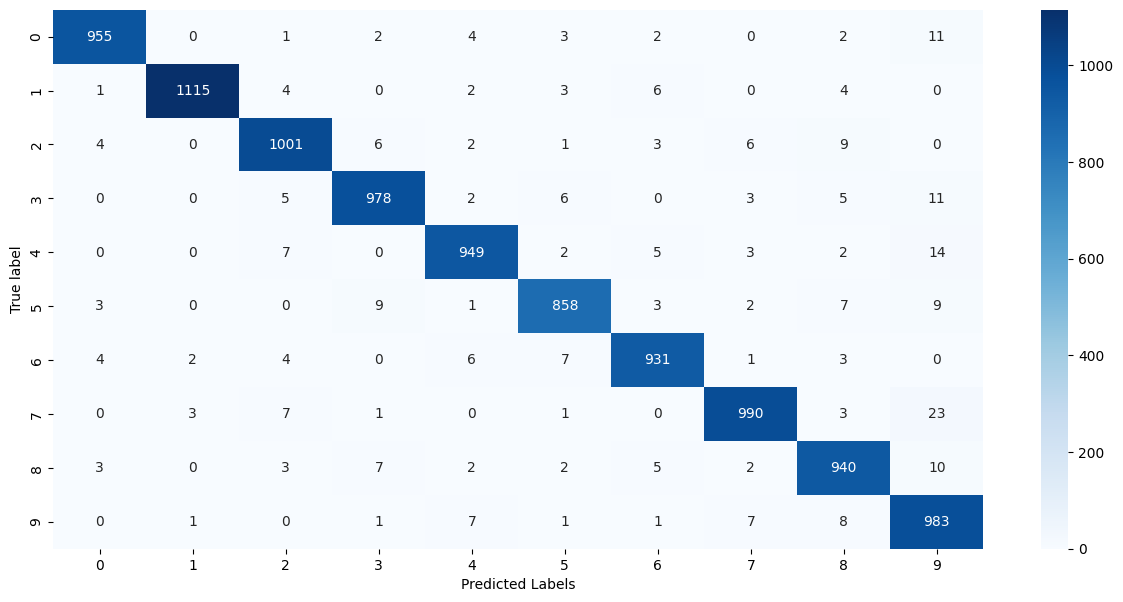

In [52]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted Labels')

In [57]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [58]:
type(input_image)

numpy.ndarray

In [59]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


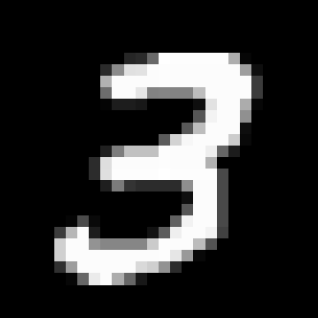

In [60]:
cv2_imshow(input_image)

In [61]:
input_image.shape

(318, 318, 3)

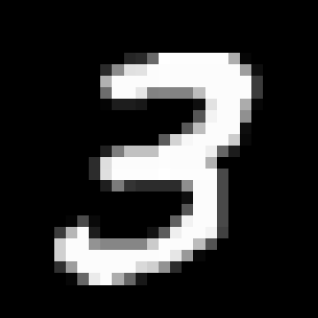

In [65]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)

In [66]:
grayscale.shape

(318, 318)

In [68]:
input_image_resize = cv2.resize(grayscale, (28,28))


In [69]:
input_image_resize.shape

(28, 28)

In [70]:
cv2_imshow(input_image_resize)

In [75]:
input_image_resize = input_image_resize/255

In [78]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [79]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.14731906 0.291162   0.23869216 0.17734915 0.3911211  0.8129966
  0.40157068 0.35956106 0.55135906 0.37946662]]


In [80]:
input_pred_label = np.argmax(input_prediction)

In [81]:
print(input_pred_label)

5


**predictive** **system**

path of the image to be predicted: dog.4976.jpg


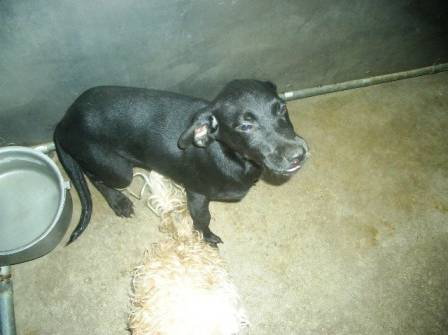

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3
3


In [88]:
input_image_path = input('path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
prayscale =cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

